# Skygeni Assignment for Data Engineering Role

## Student Details:
<b>1. Name:</b> Puli Lokesh <br>
<b>2. University:</b> Lovely Professional University

## Importing Libraries

In [1]:
# Importing all the necessary Libries for the analysis

# Library for data manipulation andd analysis and to deal with Dataframes
import pandas as pd

# Library for numerical operations including mathematical functions and support for arrays 
import numpy as np

# Libraries For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Datasets

In [2]:
#Loading all the four datasets

# Load Finanical Information Dataset
financial_df=pd.read_csv("finanical_information.csv")

# Load Industry Client Details Dataset
industry_df=pd.read_csv("industry_client_details.csv")

# Load Payment Information Dataset 
payment_df=pd.read_csv("payment_information.csv")

# Load Subscription Information Dataset
subscription_df=pd.read_csv("subscription_information.csv")

## Data Inspection and Exploring

In [3]:
# Overview of starting few rows of Finanical Information Dataset
print("Finanical Information Dataset:")
financial_df.head()


Finanical Information Dataset:


,Unnamed: 0,start_date,end_date,inflation_rate,gdp_growth_rate
0,0,2018-01-01,2018-03-31,5.77,3.51
1,1,2018-04-01,2018-06-30,1.17,2.15
2,2,2018-07-01,2018-09-30,1.56,1.82
3,3,2018-10-01,2018-12-31,2.78,2.43
4,4,2019-01-01,2019-03-31,6.91,3.44


In [4]:
# Overview of starting few rows of Industry Client Details Dataset
print("Industry Client Details Dataset:")
industry_df.head()


Industry Client Details Dataset:


,client_id,company_size,industry,location
0,4280387012,Large,Finance Lending,Mumbai
1,2095513148,Small,Finance Lending,Chennai
2,7225516707,Medium,Finance Lending,New Delhi
3,8093537819,Large,Block Chain,Mumbai
4,4387541014,Medium,Hyper Local,Banglore


In [5]:
# Overview of starting few rows of Payment Information Dataset
print("Payment Information Dataset:")
payment_df.head()


Payment Information Dataset:


,client_id,payment_date,amount_paid,payment_method
0,6292156167,9/16/2019,447.0,Bank Transfer
1,7462725203,5/21/2018,379.7,Bank Transfer
2,4698004907,9/11/2021,435.1,Check
3,3510240337,12/7/2020,413.1,Check
4,7501599785,3/4/2019,61.1,Bank Transfer


In [6]:
# Overview of starting few rows of Subscription Information Dataset
print("Subscription Information Dataset:")
subscription_df.head()

Subscription Information Dataset:


,client_id,subscription_type,start_date,end_date,renewed
0,1131383004,Yearly,2020-11-11,2021-11-11,False
1,4309371709,Monthly,2021-05-24,2021-06-23,True
2,3183675157,Yearly,2021-12-25,2022-12-25,True
3,5371694837,Monthly,2020-03-14,2020-04-13,True
4,5157113076,Monthly,2019-11-07,2019-12-07,False


There are no Null/Missing values in any of the four datasets which i have checked for accurate results and to avoid any misleading insights. All the null values are Zeroes (df.isnull().sum()=0) for all the datsets. 

### Question 1: How many finance lending and blockchain clients does the organization have?

In [7]:
# I am going to use industry Clinets Infromation dataset here as it has industries information

# To include Clients only from Finance lending and Blockchain industries
industries = industry_df[industry_df['industry'].isin(['Finance Lending','Block Chain'])]

# To count the clients in selected industries
Clients_count = industries['industry'].value_counts()

# Print the clients count in target ndustries
print("Count of the Clients in Finance lending and Blockchain industries:")
print(Clients_count)



Count of the Clients in Finance lending and Blockchain industries:
Block Chain        25
Finance Lending    22
Name: industry, dtype: int64


#### Distribution for count of clients in Finance lending and Blockchain industries

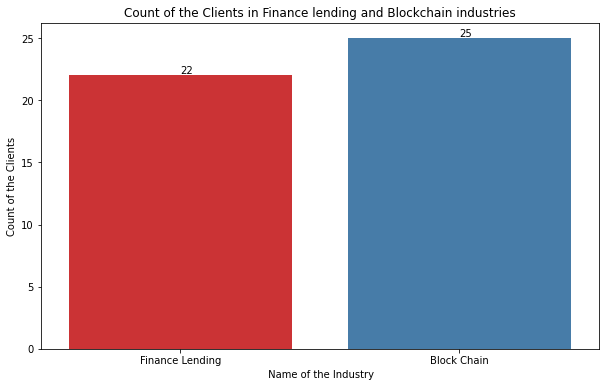

In [8]:
# Setting up the Size of the figure
plt.figure(figsize=(10,6))

# Countplot to show the distribution of target industries
viz = sns.countplot(data=industries,x='industry',palette='Set1')
 
# To show the count on the top of the bars

#Iterate through the bars in the countplot and add the counts at the top of the bar at center position
for i in viz.patches:
    viz.annotate(f'{i.get_height()}', (i.get_x() + i.get_width()/2, i.get_height()), va='bottom')
    
# Setting up Title and Labels
plt.title("Count of the Clients in Finance lending and Blockchain industries")
plt.xlabel(" Name of the Industry")
plt.ylabel("Count of the Clients")
plt.show()



#### Insight / Answer: Organization have 25 Clients in Block Chain Industry and 22 Clients in Finance lending Industry.

### Question 2: Which industry in the organization has the highest renewal rate?

In [9]:
# We need to merge the Subscription Information Dataset with Industry Client Details Dataset with the unique Column 'client_id' 
#as we want Organizaton Name from the Industry Client Details Dataset 
merge_df=pd.merge(subscription_df,industry_df,on='client_id')

# Overview of the merged dataset
merge_df.head()

# Group the rows by unique values of "industry" Column 
# Take the mean of reneweals which is boolean column
# Python treats False=0 and True=1 as booleans are actually subtype of integers

renewal_rate=merge_df.groupby('industry')['renewed'].mean()

#Print the industry in organization with the highest renewal rate
# idxmax() to return the inustry with max value
print(f"industry  with the highest renewal rate is '{renewal_rate.idxmax()}' with the rate {renewal_rate.max():.4f}")


industry  with the highest renewal rate is 'Gaming' with the rate 0.7273


#### Distibution of Reneweal Rates of Different Industries:

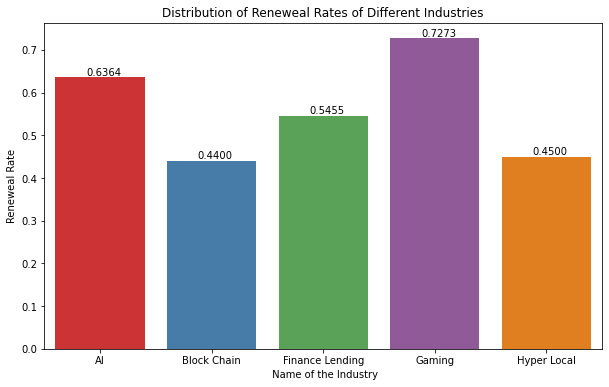

In [10]:
# Setting up the Size of the figure
plt.figure(figsize=(10,6))

# barplot to show the distribution of Reneweal Rates of Different Industries
viz = sns.barplot(x=renewal_rate.index,y=renewal_rate.values,palette='Set1')

#Iterate through the bars in the countplot and add the counts at the top of the bar at center position
for i in viz.patches:
    viz.annotate(f'{i.get_height():.4f}', (i.get_x()+ i.get_width()/2.9 , i.get_height()), va='bottom')
    
# Setting up Title and Labels
plt.title("Distribution of Reneweal Rates of Different Industries")
plt.xlabel(" Name of the Industry")
plt.ylabel("Reneweal Rate")
plt.show()

#### Insight/Answer: Gaming Industry has the highest Renewal Rate 0.7273 in the Organization

### Question 3: What was the average inflation rate when their subscriptions were renewed?

In [11]:
# Ensuring all the dates are in same format
financial_df['start_date']=pd.to_datetime(financial_df['start_date'])
financial_df['end_date']=pd.to_datetime(financial_df['end_date'])
subscription_df['end_date']=pd.to_datetime(subscription_df['end_date'])

#Filter to keep the renewed subscriptions only
renewed_df = subscription_df[subscription_df['renewed']==True].copy()

# Match the end_date of renewed subscription to financial period
def find_inflation(date):
    row=financial_df[(financial_df['start_date'] <= date) & (financial_df['end_date'] >=date)]
    if not row.empty:
        return row.iloc[0]['inflation_rate']
    return None
# Apply to eaach renewed subscription
renewed_df['matched_inflation']=renewed_df['end_date'].apply(find_inflation)

# find the average inflation
avrg_inflation = renewed_df['matched_inflation'].mean()

print("The average inflation rate when their subscriptions were renewed is:",avrg_inflation)


The average inflation rate when their subscriptions were renewed is: 4.311800000000001


#### Insight/Answer: The average inflation rate is 4.311 when their subscriptions are renewed.

### Question 4: What is the median amount paid each year for all payment methods? 

In [12]:
# I am going to use Payment Information Dataset here as it contains the columns amount_paid and payment_method

# Ensuring all the dates are in same format
payment_df['payment_date'] = pd.to_datetime(payment_df['payment_date'])

# Extract year from the payment date as we need to find median for each year
payment_df['year'] = payment_df['payment_date'].dt.year 

# Median amount paid for each year for all types of payments together
amount_median= payment_df.groupby(['year'])['amount_paid'].median()

# Show the result
print("Median amount paid for each year for alltypes of payments together:",amount_median)



Median amount paid for each year for alltypes of payments together: year
2018    235.7
2019    360.9
2020    284.5
2021    306.8
2022    288.0
Name: amount_paid, dtype: float64


#### Median of every payment method in each year

In [13]:
# Group the rows by unique values in the Year column and Payment methods
# Find the median of amount_paid each year
amount_median= payment_df.groupby(['year','payment_method'])['amount_paid'].median()

# Making the result into Dataframe
amount_median=pd.DataFrame(amount_median)

# Changing the name of column
amount_median.rename(columns={'amount_paid':'median_amount_paid'},inplace=True)

# Display the output with all the rows
print("Median amount paid each year for all payment methods:")
amount_median.head(len(amount_median))

Median amount paid each year for all payment methods:


median_amount_paid
year payment_method                    
2018 Bank Transfer               281.65
     Check                       216.60
     Credit Card                 229.15
2019 Bank Transfer               184.20
     Check                       410.20
     Credit Card                 401.90
2020 Bank Transfer               225.10
     Check                       413.10
     Credit Card                 285.25
2021 Bank Transfer               255.30
     Check                       435.10
     Credit Card                 208.70
2022 Bank Transfer               196.50
     Check                       275.50
     Credit Card                 326.20

## Result:

1. Organization have 25 Clients in Block Chain Industry and 22 Clients in Finance lending Industry.
2. Gaming Industry has the highest Renewal Rate 0.7273 in the Organization.
3. The average inflation rate is 4.311 when their subscriptions are renewed.
4. Median for each year for all payment methods <br>
   Bank Transfer:[year 2018 : 281.65, year 2019 : 184.20, year 2020 : 225.10, year 2021 : 255.30, year 2022 : 196.50]<br>
     for Check : [year 2018 : 216.60, year 2019 : 410.20, year 2020 : 413.10, year 2021 : 435.10, year 2022 : 275.50]<br>
    Credit Card :[year 2018 : 229.15, year 2019 : 401.90, year 2020 : 285.25, year 2021 : 208.70, year 2022 : 326.20] <br>
    <br>
  Median amount paid for each year all payments together :<br>
  [year 2018 : 235.7, year 2019 : 360.9, year 2020 : 284.5, year 2021 :306.8, year 2022 : 288.0]